# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import math

## Load Data

In [2]:
url = 'https://raw.githubusercontent.com/Ajay-user/ML-DL-RL-repo/master/Regression/Datasets/S%26P500_Stock_Data.csv'
stock_df = pd.read_csv(url)
stock_df.head(3)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337


## Explore Data

In [3]:
stock_df.describe().iloc[:3, :]

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745


In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.5 KB


## Visualize Data

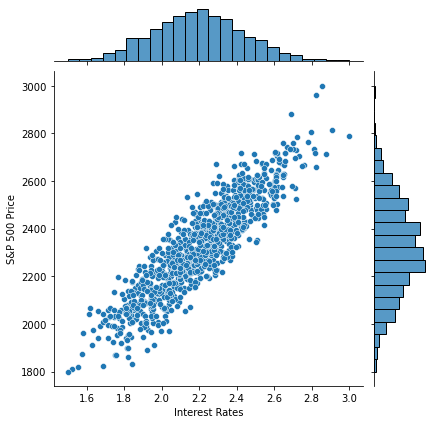

In [5]:
sns.jointplot(x='Interest Rates', y='S&P 500 Price', data=stock_df);

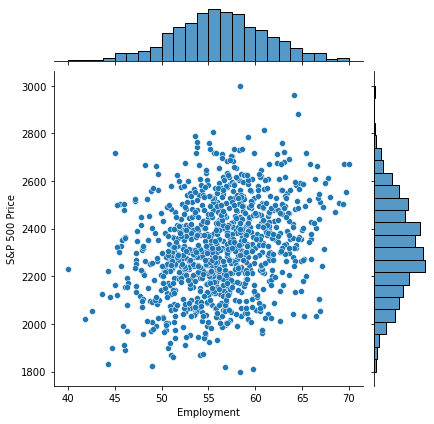

In [6]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=stock_df);

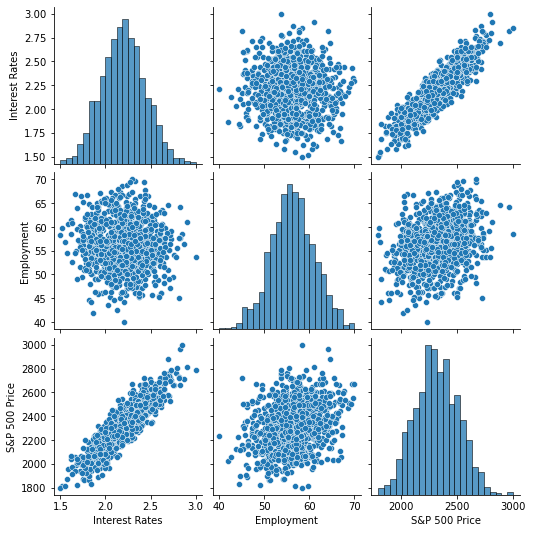

In [7]:
sns.pairplot(stock_df);

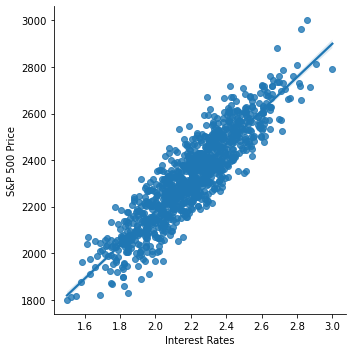

In [8]:
sns.lmplot(x='Interest Rates', y='S&P 500 Price', data=stock_df);

## Features and Targets

In [9]:

X = stock_df.drop(columns=['S&P 500 Price'])
y = stock_df['S&P 500 Price']

print('Shape of Independent variable',X.shape)
print('Shape of Dependent variable',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print('Shape of Training data X',X_train.shape)
print('Shape of Training data y',y_train.shape)
print('Shape of Testing data X',X_test.shape)
print('Shape of Testing data y',y_test.shape)

Shape of Independent variable (1000, 2)
Shape of Dependent variable (1000,)
Shape of Training data X (750, 2)
Shape of Training data y (750,)
Shape of Testing data X (250, 2)
Shape of Testing data y (250,)


## Modeling

**dependent_var = y_intercept + coef1 * independent_var1 + coef2 * independent_var2**

In [10]:
# instantiate
multi_reg = LinearRegression()
# training
multi_reg.fit(X_train, y_train)


# dependent_var = y_intercept + coef1*independent_var1 + coef2*independent_var2
print('Model coefficent', multi_reg.coef_)
print('Model intercept', multi_reg.intercept_)

Model coefficent [725.21786558  12.06907931]
Model intercept 48.54271464072235


In [112]:
coef_df = pd.DataFrame(data={'coefficient':multi_reg.coef_}, index=X_test.columns)
coef_df

,coefficient
Interest Rates,725.217866
Employment,12.069079


## Making Predictions

In [11]:
predictions = multi_reg.predict(X_test)

## Evaluation

In [12]:
# Mean absolute error

# MAE = mean( absolute(true_val - predicted_val) ))

mae = np.mean(np.absolute((y_test-predictions)))

print('Mean absolute error', mae)

Mean absolute error 51.632923188126725


In [13]:
# Mean squared error

# MSE = mean( (true_val - predicted_val)^2 ))

mse = np.mean( (y_test-predictions)**2 )

print('Mean squared error', mse)

Mean squared error 4177.127669315986


In [14]:
# Root mean squared error
rmse = np.sqrt(mse)
print('Root mean squared error', rmse)

Root mean squared error 64.6307022189608


In [15]:
# Mean absoulte percentage error

# mape = mean( absolute((true_val - predictions) / true_val) ) * 100       

mape = np.mean(  np.absolute( (y_test-predictions)/y_test )  )*100 

print('Mean absoulte percentage error',mape)

Mean absoulte percentage error 2.22348413845528


In [16]:
# Mean percentage error

# mpe = mean( ((true_val - predictions) / true_val) ) * 100       

mpe = np.mean( ( (y_test-predictions)/y_test )  )*100 

print('Mean percentage error',mpe)

Mean percentage error -0.02138475044608862


## Visulaize Predictions

In [77]:
def get_axis(x,y, model):
    xx = np.linspace(x.min(), x.max(), len(x))
    yy = np.linspace(y.min(), y.max(), len(y))
    
    XX, YY = np.meshgrid(xx, yy)
    
    feature = pd.DataFrame(data={'Interest Rates':XX.ravel(), 'Employment':YY.ravel()})
    
    preds = model.predict(feature)
    
    ZZ = preds.reshape(XX.shape)
    
    return XX, YY, ZZ

def plot_3d(x, y, z):
    pass
    
    

In [67]:
X, Y, Z = get_axis(X_test['Interest Rates'],X_test['Employment'], multi_reg)

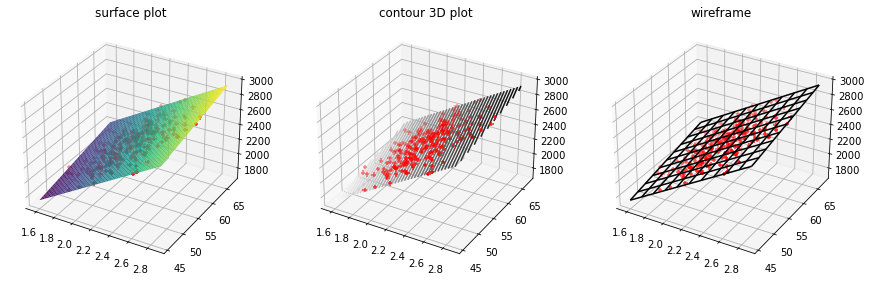

In [110]:
fig = plt.figure(figsize=(15,15))
# Axis is the axis of the plot, the thing that gets ticks and tick labels. The axes is the area your plot appears
ax = plt.subplot(1,3,1,projection='3d')
ax.scatter3D(X_test['Interest Rates'], X_test['Employment'], predictions, marker='+', color='red' )
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('surface plot');


ax = plt.subplot(1,3,2,projection='3d')
ax.scatter3D(X_test['Interest Rates'], X_test['Employment'], predictions, marker='+', color='red' )
ax.contour3D(X, Y, Z, 50, cmap='binary');
ax.set_title('contour 3D plot');



ax = plt.subplot(1,3,3,projection='3d')
ax.scatter3D(X_test['Interest Rates'], X_test['Employment'], predictions, marker='+', color='red' )
ax.plot_wireframe(X, Y, Z, rcount=10, ccount=10, color='black')
ax.set_title('wireframe');
